<h2>HW 3</h2>
Matt Buchovecky
Astro 283

In [25]:
import numpy
from astropy.io import fits 
from scipy import optimize
from matplotlib import pyplot 
%matplotlib inline 


$$P\left(N\bigr|\lambda\right)$$
$$P\left(D_{x,y}\bigr|\mu_{x,y}\right) \propto \frac{\lambda^Ne^{-\lambda}}{N!}$$
$\exp{\left[-\frac{\left(D_{x,y}-\mu_{x,y}\right)^2}{\mu_{x,y}}\right]}$  
$k=3.0\frac{e^-}{DN}$  
$N_e=kN_{DN}$  
$\sigma_{DN}=\frac{1}{k}\sigma_N$  
$p\left(F\bigr|D\right)=\int p$  
$$ \vec z = \left(x_c, y_c, F, \sigma_{PSF}, B\right) $$

<h2>Fitting the most likely parameters</h2>
Since we are modelling the Point Spread Function to be a symmetric 2D gaussian with amplitude of the point flux $F$ at the true center, the expected signal at a location elsewhere will follow:  
$$  f\left(x,y,\vec z\right) = Fexp{\left[-\frac{\left(x-x_0\right)^2+\left(y-y_0\right)^2}{2\sigma_{PSF}^2}\right]} $$

The probability distribution for getting a signal given the fit parameters, at a specific position, is:  
$$ p\left(\vec{z_0}\mid D_{x,y}\right) \propto $$

Open the file

In [39]:
star_fits = fits.open("./hw3prob1-data.fits")
star_data = star_fits[0].data
print(star_fits[0].header)
print(star_data)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  256                                                  NAXIS2  =                  256                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

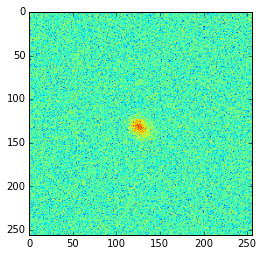

In [27]:
fig = pyplot.figure()
pyplot.imshow(star_data)

In [36]:
def symm_2d_gaussian(pos, F, xc, yc, sigma, B):
    return F*numpy.exp(-((pos[0]-xc)**2+(pos[1]-yc)**2)/(2*sigma**2)) + B
    

In [29]:
x_bins = star_data.shape[0]
y_bins = star_data.shape[1]

# Create x and y indices
x_arr = numpy.linspace(0, x_bins-1, x_bins)
y_arr = numpy.linspace(0, y_bins-1, y_bins)
x_arr, y_arr = numpy.meshgrid(x_arr, y_arr)
coords = x_arr, y_arr


In [38]:
init_guess = (50, 130, 130, 20, 100)
sigma_array = numpy.sqrt(star_data)
p_opt, p_cov = optimize.curve_fit(symm_2d_gaussian, (x_arr.ravel(), y_arr.ravel()), star_data.ravel(), init_guess, sigma_array.ravel())

print(p_opt)
print(p_cov)

[  26.19307439  125.97306338  132.45200263    7.12770422  133.01420735]
[[  6.39519640e-01  -7.28902835e-04  -5.15136452e-04  -8.47618501e-02
    5.40768242e-05]
 [ -7.28902835e-04   4.47657085e-02   4.12282595e-04   9.38851826e-05
    1.73620913e-07]
 [ -5.15136452e-04   4.12282595e-04   4.48411736e-02   6.93612111e-05
    4.17846893e-08]
 [ -8.47618501e-02   9.38851826e-05   6.93612111e-05   2.23523737e-02
   -3.87444199e-04]
 [  5.40768242e-05   1.73620913e-07   4.17846893e-08  -3.87444199e-04
    6.92884736e-04]]
